# Exploración de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

Para que este Notebook funcione correctamente se deben importar los datos, estos se obtienen directamente desde Kaggle.
En caso de no tener instalado Kaggle se debe ejecutar esta linea de código:

In [2]:
pip install kaggle

Para que el siguiente comando de Bash descargue los datos es necesario subir el archivo *kaggle.json* al Colab

In [3]:
%%bash
chmod 600 ./kaggle.json
export KAGGLE_CONFIG_DIR=.
kaggle datasets download -d devansodariya/road-accident-united-kingdom-uk-dataset
unzip road-accident-united-kingdom-uk-dataset.zip


Archive:  road-accident-united-kingdom-uk-dataset.zip
  inflating: UK_Accident.csv         


100%|██████████| 56.8M/56.8M [00:01<00:00, 55.2MB/s]


## Selección de datos

Escogemos los datos con los que vamos a trabajar, en este caso los correspondientes al año 2014

In [4]:
Full_Data = pd.read_csv('UK_Accident.csv')

In [5]:
Data = Full_Data[Full_Data.Year == 2014]
Data

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1357828,318375,201401BS70001,524600.0,179020.0,-0.206443,51.496345,1,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,No,E01002814,2014
1357829,318376,201401BS70002,525780.0,178290.0,-0.189713,51.489523,1,3,2,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lighting unknown,Fine without high winds,Dry,None,None,1,No,E01002894,2014
1357830,318377,201401BS70003,526880.0,178430.0,-0.173827,51.490536,1,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002822,2014
1357831,318378,201401BS70004,525580.0,179080.0,-0.192311,51.496668,1,3,1,1,...,Zebra crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01002812,2014
1357832,318379,201401BS70006,527040.0,179030.0,-0.171308,51.495892,1,3,2,1,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


Convertimos los strings en datos de tiempo que pandas pueda reconocer

In [ ]:
Data['Timestamp'] = Data.Date + ' ' + Data.Time
Data.Timestamp = pd.to_datetime(Data.Timestamp, format = '%d/%m/%Y %H:%M')

In [ ]:
Data.Date = Data.Timestamp.dt.date
Data.Day_of_Week = Data.Timestamp.dt.day_name()
Data.Time = Data.Timestamp.dt.time
Data['Month'] = Data.Timestamp.dt.month
Data['Hour'] = Data.Timestamp.dt.hour
Data['Day_of_Month'] = Data.Timestamp.dt.day
Data['Day_of_year'] = Data.Timestamp.dt.day_of_year

Resumen de los datos

In [ ]:
Data.describe()

,Unnamed: 0.1,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,Month,Hour,Day_of_Month,Day_of_year
count,1.463220e+05,146322.000000,146322.000000,1.463220e+05,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,...,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.0,146322.000000,146322.000000,146322.000000,146322.000000
mean,1.430988e+06,391535.500000,447029.362475,2.903741e+05,-1.328712,52.500882,29.895839,2.836033,1.835179,1.329103,...,1002.119592,38.238611,2.810234,377.446023,1.341951,2014.0,6.624445,13.515165,15.506055,185.781291
std,4.223967e+04,42239.667382,95158.326674,1.578227e+05,1.397358,1.421337,25.190838,0.399682,0.700208,0.857469,...,1791.325195,13.850167,3.193163,1288.061037,0.474365,0.0,3.437250,5.045539,8.716316,104.687629
min,1.357828e+06,318375.000000,70951.000000,1.030400e+04,-7.450342,49.913077,1.000000,1.000000,1.000000,1.000000,...,0.000000,20.000000,-1.000000,-1.000000,1.000000,2014.0,1.000000,0.000000,1.000000,1.000000
25%,1.394408e+06,354955.250000,384364.250000,1.765900e+05,-2.235527,51.474928,6.000000,3.000000,1.000000,1.000000,...,0.000000,30.000000,-1.000000,0.000000,1.000000,2014.0,4.000000,10.000000,8.000000,95.000000
50%,1.430988e+06,391535.500000,451306.000000,2.416200e+05,-1.238819,52.055124,30.000000,3.000000,2.000000,1.000000,...,146.000000,30.000000,4.000000,0.000000,1.000000,2014.0,7.000000,14.000000,15.000000,188.000000
75%,1.467569e+06,428115.750000,526830.000000,3.911760e+05,-0.170586,53.414623,45.000000,3.000000,2.000000,1.000000,...,762.000000,40.000000,6.000000,0.000000,2.000000,2014.0,10.000000,17.000000,23.000000,278.000000
max,1.504149e+06,464696.000000,655309.000000,1.190858e+06,1.758797,60.597984,98.000000,3.000000,21.000000,93.000000,...,9999.000000,70.000000,6.000000,9999.000000,2.000000,2014.0,12.000000,23.000000,31.000000,365.000000


## Análisis variable objetivo

La variable objetivo del análisis es Number_of_Casualties

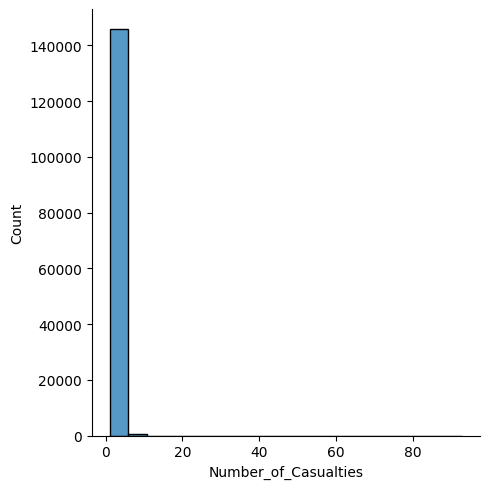

In [ ]:
sns.displot(Data['Number_of_Casualties'])

Se puede apreciar una alta asimetria hacia valores cercanos a 1, debido a que es un valor entero se procede a verificar los valores únicos de esta variable para verificar que no todos los datos sean 1

In [ ]:
Data['Number_of_Casualties'].unique()

array([ 1,  2,  5,  3,  4,  6,  7, 12,  8, 10,  9, 18, 11, 19, 13, 87, 21,
       20, 17, 41, 16, 93, 15, 14, 27, 54])

Se puede verificar que hay más datos por lo que se puede aplicar una transformación logarítmica para apreciar mejor los datos

In [ ]:
Data['Number_of_Casualties_log'] = np.log1p(Data['Number_of_Casualties'])

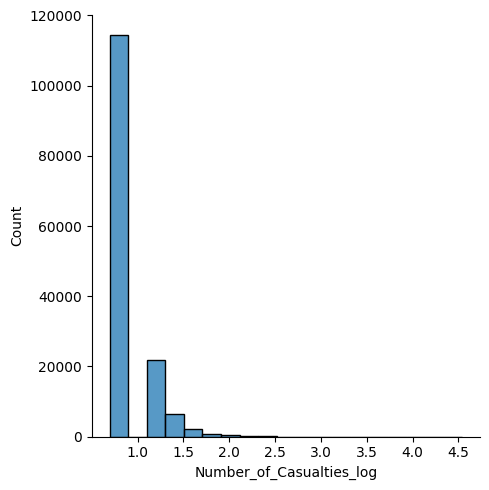

In [ ]:
sns.displot(Data['Number_of_Casualties_log'])

## Exploración de variables

Lista de variables que tenemos disponibles en el Dataset

In [ ]:
for i in Data.columns:
    print(i)

Unnamed: 0.1
Unnamed: 0
Accident_Index
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Date
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location
Year
Timestamp
Month
Hour
Day_of_Month
Day_of_year
Number_of_Casualties_log


### Histogramas

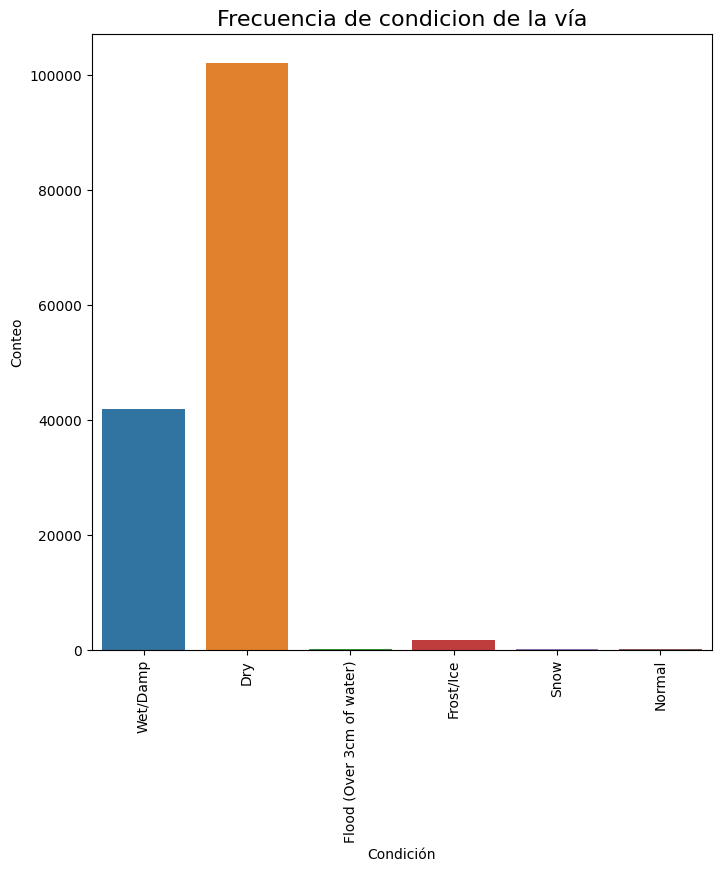

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Road_Surface_Conditions', data = Data).set_title("Frecuencia de condicion de la vía", fontsize=16)
plt.xticks(rotation = 90)
plt.xlabel('Condición')
plt.ylabel('Conteo')
plt.show()

Del análisis de la condición del clima se puede apreciar que la condición donde más se presentan accidentes es el clima seco, seguido por el clima mojado o húmedo.

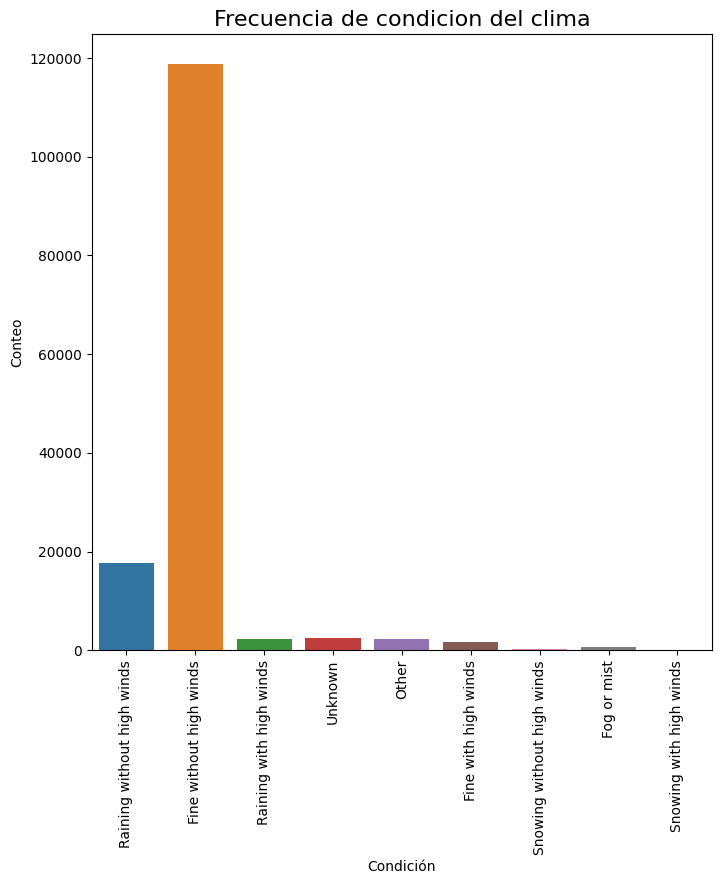

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Weather_Conditions', data = Data).set_title("Frecuencia de condicion del clima", fontsize=16)
plt.xticks(rotation = 90)
plt.xlabel('Condición')
plt.ylabel('Conteo')
plt.show()

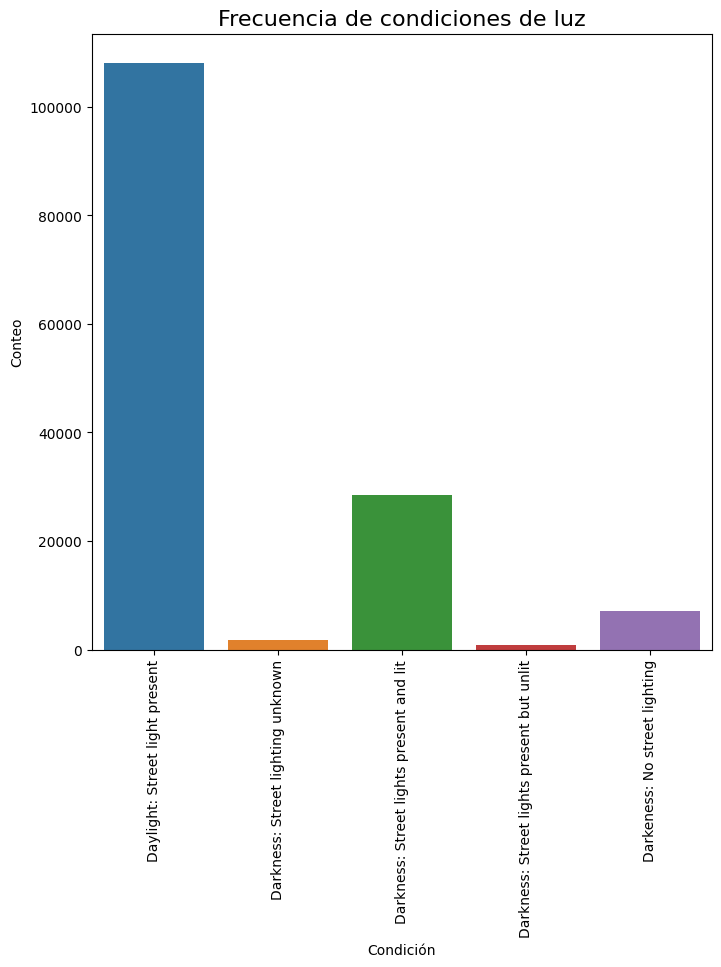

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Light_Conditions', data = Data).set_title("Frecuencia de condiciones de luz", fontsize=16)
plt.xticks(rotation = 90)
plt.xlabel('Condición')
plt.ylabel('Conteo')
plt.show()

La mayor parte de accidentes del total ocurren durante el día cuando las luces de las calles no están iluminadas, y otro porcentaje apreciable durante la noche con luces presentes y encendidas (condiciones óptimas).

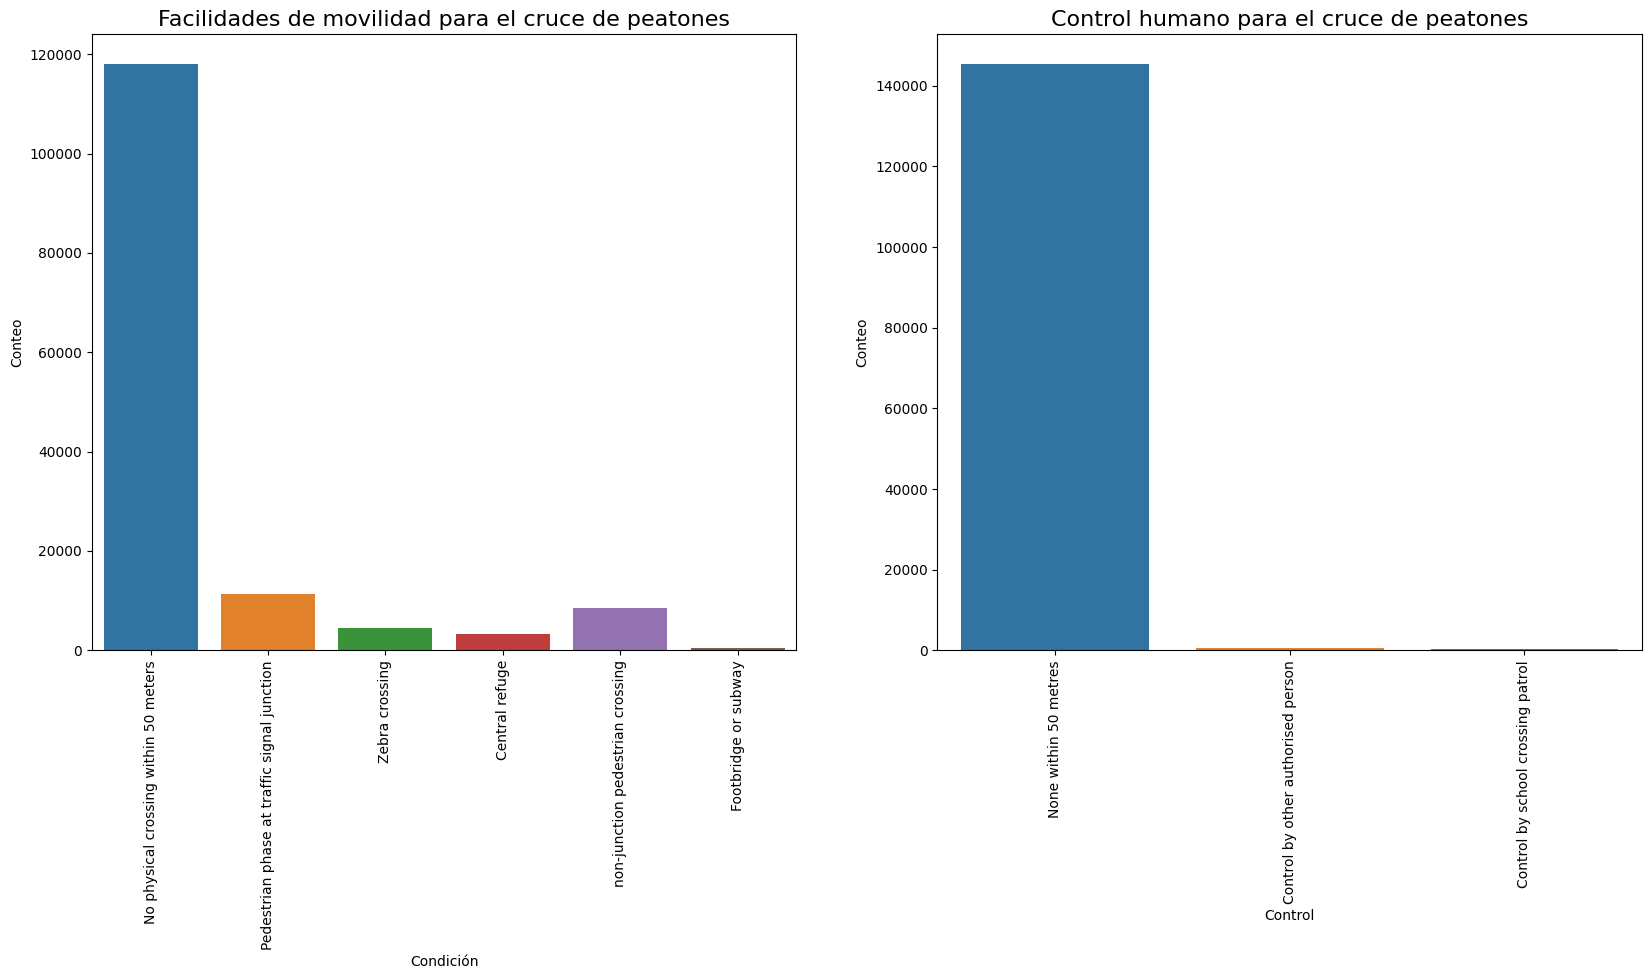

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))

sns.countplot(x = 'Pedestrian_Crossing-Physical_Facilities', data = Data, ax=ax1)
ax1.set_title("Facilidades de movilidad para el cruce de peatones", fontsize=16)
ax1.tick_params(labelrotation=90, axis = 'x')
ax1.set_xlabel('Condición')
ax1.set_ylabel('Conteo')

sns.countplot(x = 'Pedestrian_Crossing-Human_Control', data = Data, ax=ax2)
ax2.set_title("Control humano para el cruce de peatones", fontsize=16)
ax2.set_xlabel('Control')
ax2.set_ylabel('Conteo')
ax2.tick_params(labelrotation=90, axis='x')
plt.show()

El porcentaje de accidentes es significativamente grande cuando no existen facilidades de movilidad para que crucen los peatones en un radio de 50 metros, mientras que otros dos porcentajes notables se presentan en las intersecciones de varios cruces: 'pedestrian phase at traffic signal juction' y 'non-juction pedestrian crossing'.

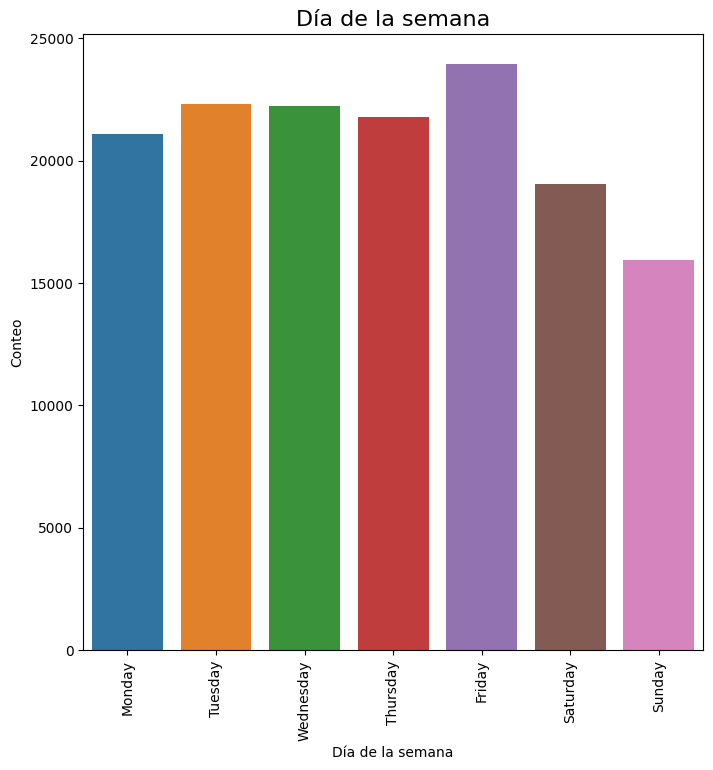

In [ ]:
plt.figure(figsize=(8,8))
orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x = 'Day_of_Week', data = Data, order = orden).set_title("Día de la semana", fontsize=16)
plt.xticks(rotation = 90)
plt.xlabel('Día de la semana')
plt.ylabel('Conteo')
plt.show()

Las cantidades de accidentes por día no difieren mucho, pero el día más marcado siniestros viales o accidentes peatonales es el viernes, y el domingo es el día con menor frecuencia de accidentes.

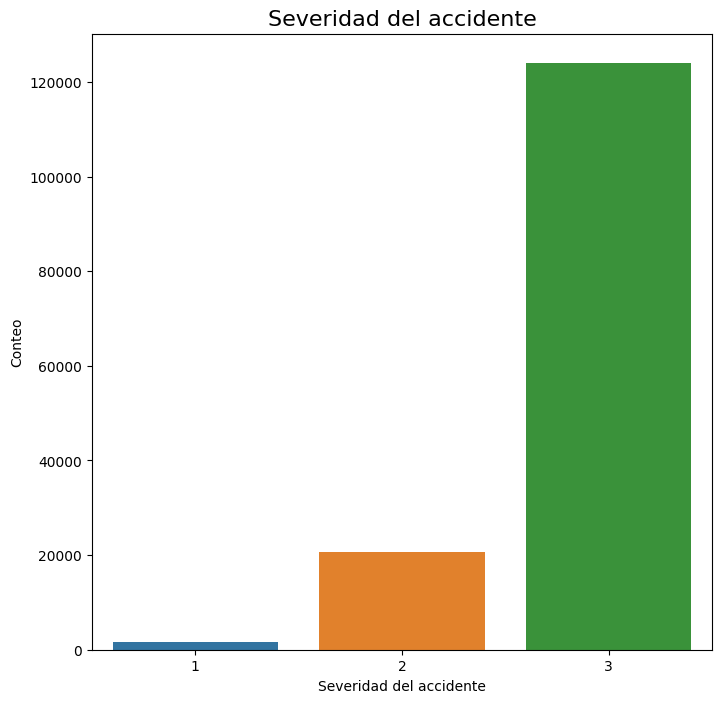

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Accident_Severity', data = Data).set_title("Severidad del accidente", fontsize=16)
plt.xlabel('Severidad del accidente')
plt.ylabel('Conteo')
plt.show()

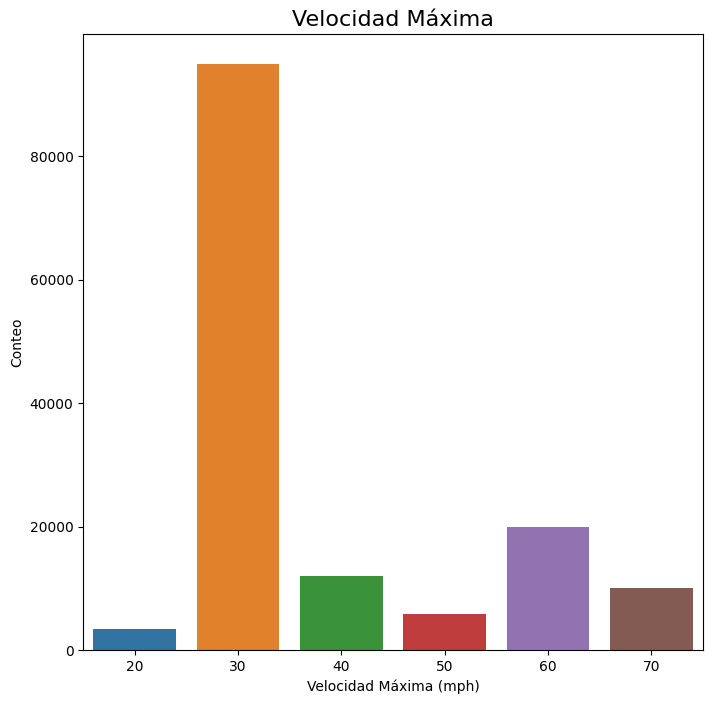

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Speed_limit', data = Data).set_title("Velocidad Máxima", fontsize=16)
plt.xlabel('Velocidad Máxima (mph)')
plt.ylabel('Conteo')
plt.show()

Según los datos, se muestra que la mayoria de los accidentes en un gran porcentaje significativamente alto se presentan cuando los vehiculos o transporte circulan a la velocidad permitida en areas urbanas, entre 30 y 40 millas por horas (siendo 30 millas la velocidad máxima permitida en areas urbanas). y otro porcentaje indica que muchas accidentes ocurren entre 60  y 70 millas por horas, que son las velocidades maximas en autopistas principales de una y doble calzada respectivamente.

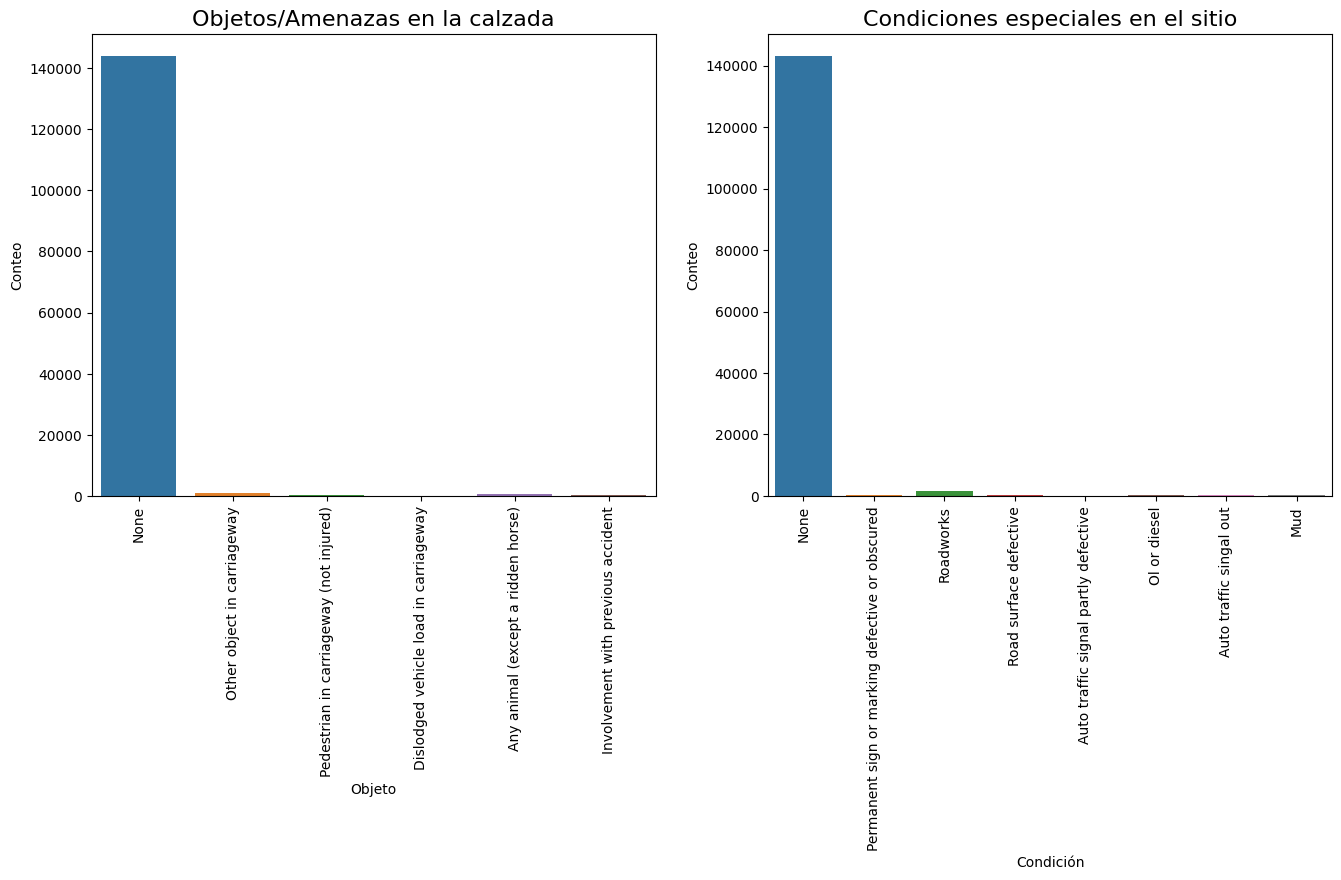

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

sns.countplot(x = 'Carriageway_Hazards', data = Data, ax=ax1)
ax1.set_title("Objetos/Amenazas en la calzada", fontsize=16)
ax1.tick_params(labelrotation=90, axis = 'x')
ax1.set_xlabel('Objeto')
ax1.set_ylabel('Conteo')

sns.countplot(x = 'Special_Conditions_at_Site', data = Data, ax=ax2)
ax2.set_title("Condiciones especiales en el sitio", fontsize=16)
ax2.set_xlabel('Condición')
ax2.set_ylabel('Conteo')
ax2.tick_params(labelrotation=90, axis='x')
plt.show()

Se puede apreciar que en la mayoria de los accidentes no hay amenazas ni condiciones especiales que se encuentren en la vía durante la ocurrencia de estos

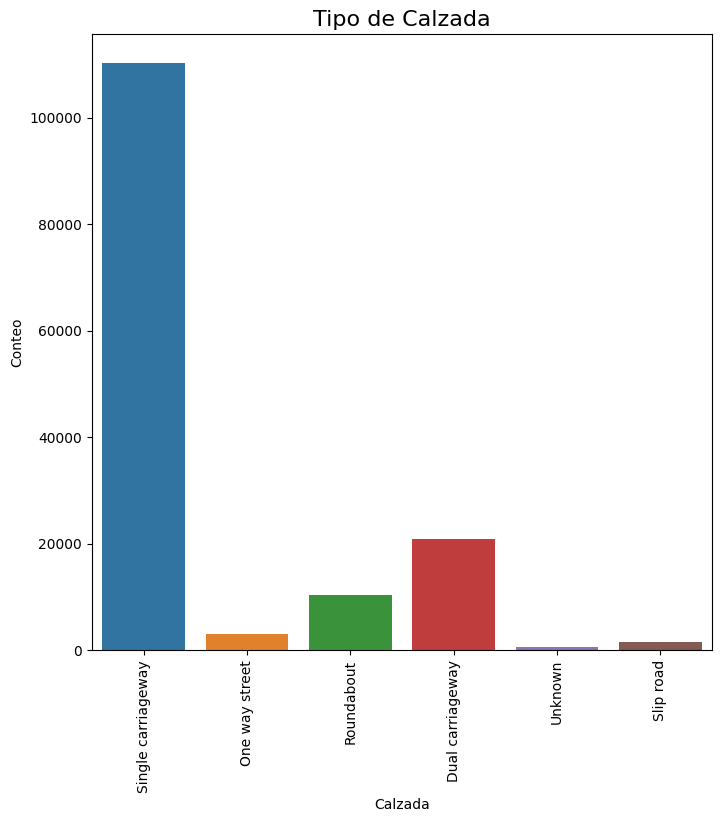

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Road_Type', data = Data).set_title("Tipo de Calzada", fontsize=16)
plt.xticks(rotation = 90)
plt.xlabel('Calzada')
plt.ylabel('Conteo')
plt.show()

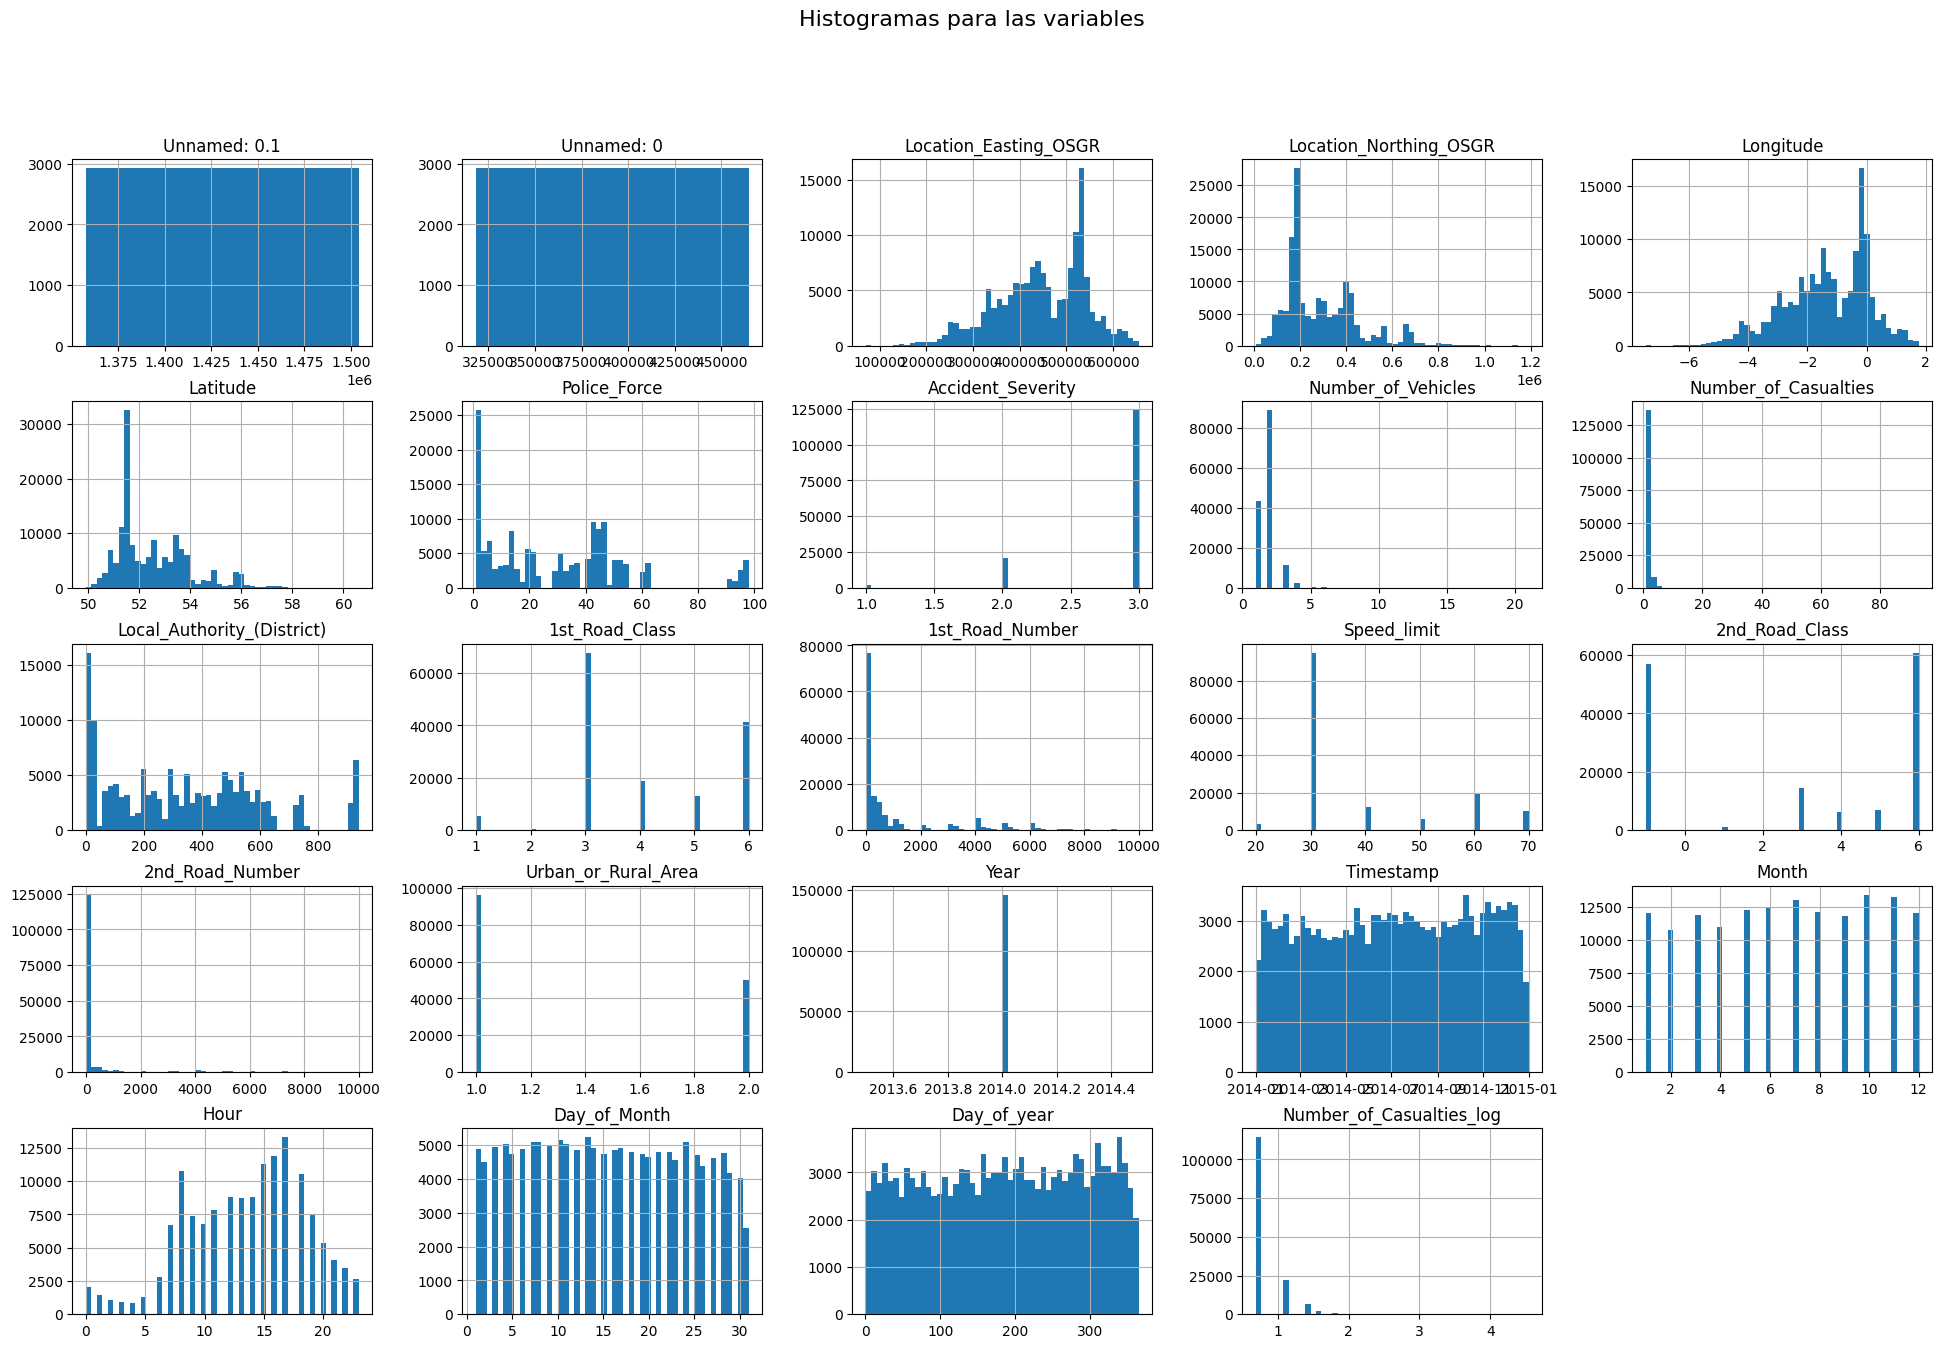

In [ ]:
Data.hist(bins=50, figsize=(24,15))
plt.suptitle('Histogramas para las variables', fontsize=16)
plt.show()

## Accidentes por mes y por hora

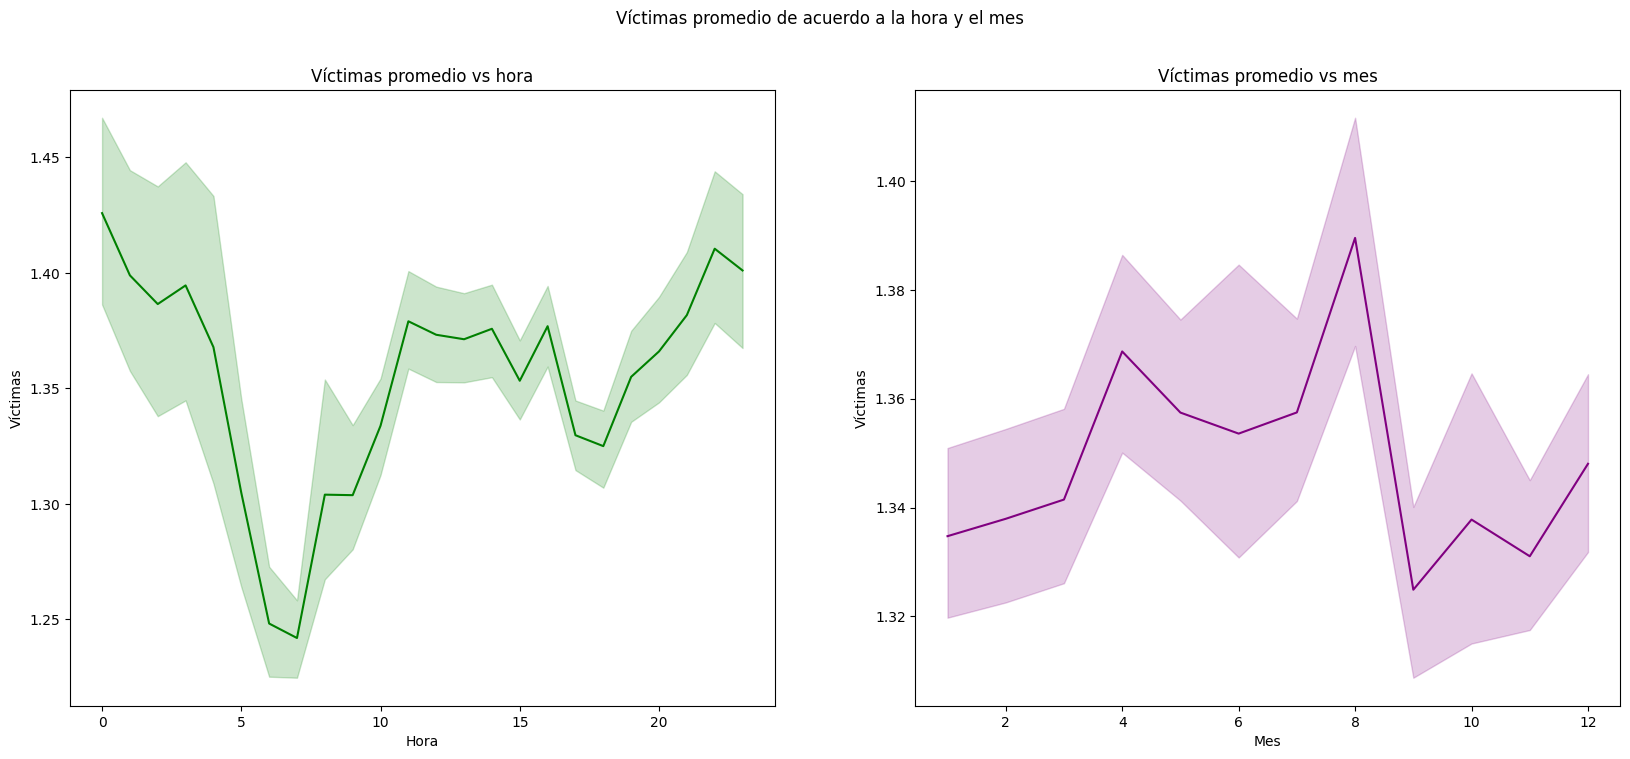

In [ ]:
grupo_horas = Data.groupby(['Timestamp', 'Hour']).Number_of_Casualties.mean().reset_index()
grupo_mes = Data.groupby(['Timestamp', 'Month']).Number_of_Casualties.mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Víctimas promedio de acuerdo a la hora y el mes')

sns.lineplot(x = grupo_horas['Hour'], y = grupo_horas['Number_of_Casualties'], color='green', ax = ax1)
ax1.set_ylabel('Víctimas')
ax1.set_xlabel('Hora')
ax1.set_title('Víctimas promedio vs hora')

sns.lineplot(x = grupo_mes['Month'], y = grupo_mes['Number_of_Casualties'], color='purple', ax = ax2)
ax2.set_ylabel('Víctimas')
ax2.set_xlabel('Mes')
ax2.set_title('Víctimas promedio vs mes')

plt.show()

Se puede observar que los meses que el número de víctimas promedio por hora tiene una disminución bastante notable entre las 5 y 8 de la mañana.

De las víctimas promedio por mes se aprecia un pico en el mes de agosto y un pequeño pico en el mes de abril.

## Identificación Area Urbana/ Rural

Se puede apreciar que en la columna de Area rural o urbana solo hay dos valores, 1 y 2:

In [ ]:
Data.Urban_or_Rural_Area.unique()

array([1, 2])

Sin embargo el dataset no nos indica a cual hace referencia 1 y 2 en la columna **Urban_or_Rural_Area**, pero se puede deducir a partir de los datos de la longitud y latitud y el mapa del Reino Unido

<Axes: xlabel='Longitude', ylabel='Latitude'>

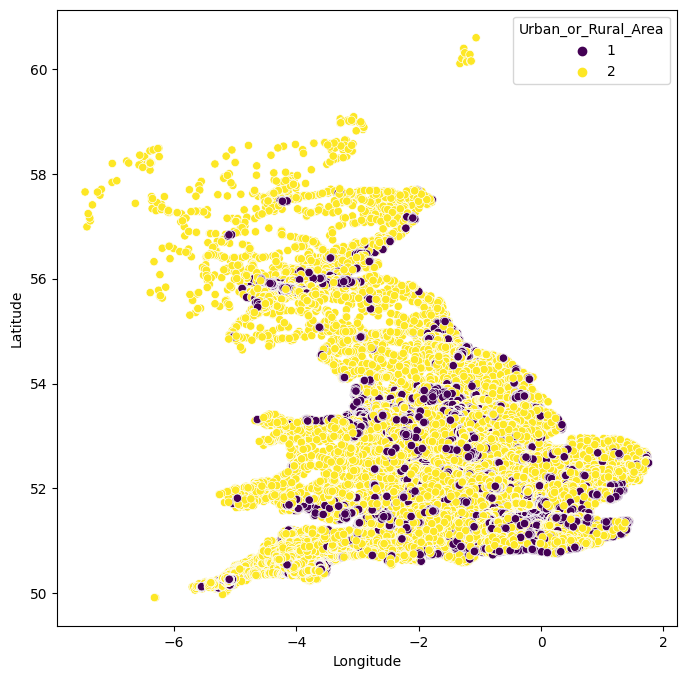

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = Data, y = 'Latitude', x = 'Longitude', hue = 'Urban_or_Rural_Area', palette = 'viridis')

Se puede deducir que el valor de 1 corresponde a Urbano y 2 a Rural

## Matriz de correlaciones

<ipython-input-34-8b73eedcabeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data.corr()


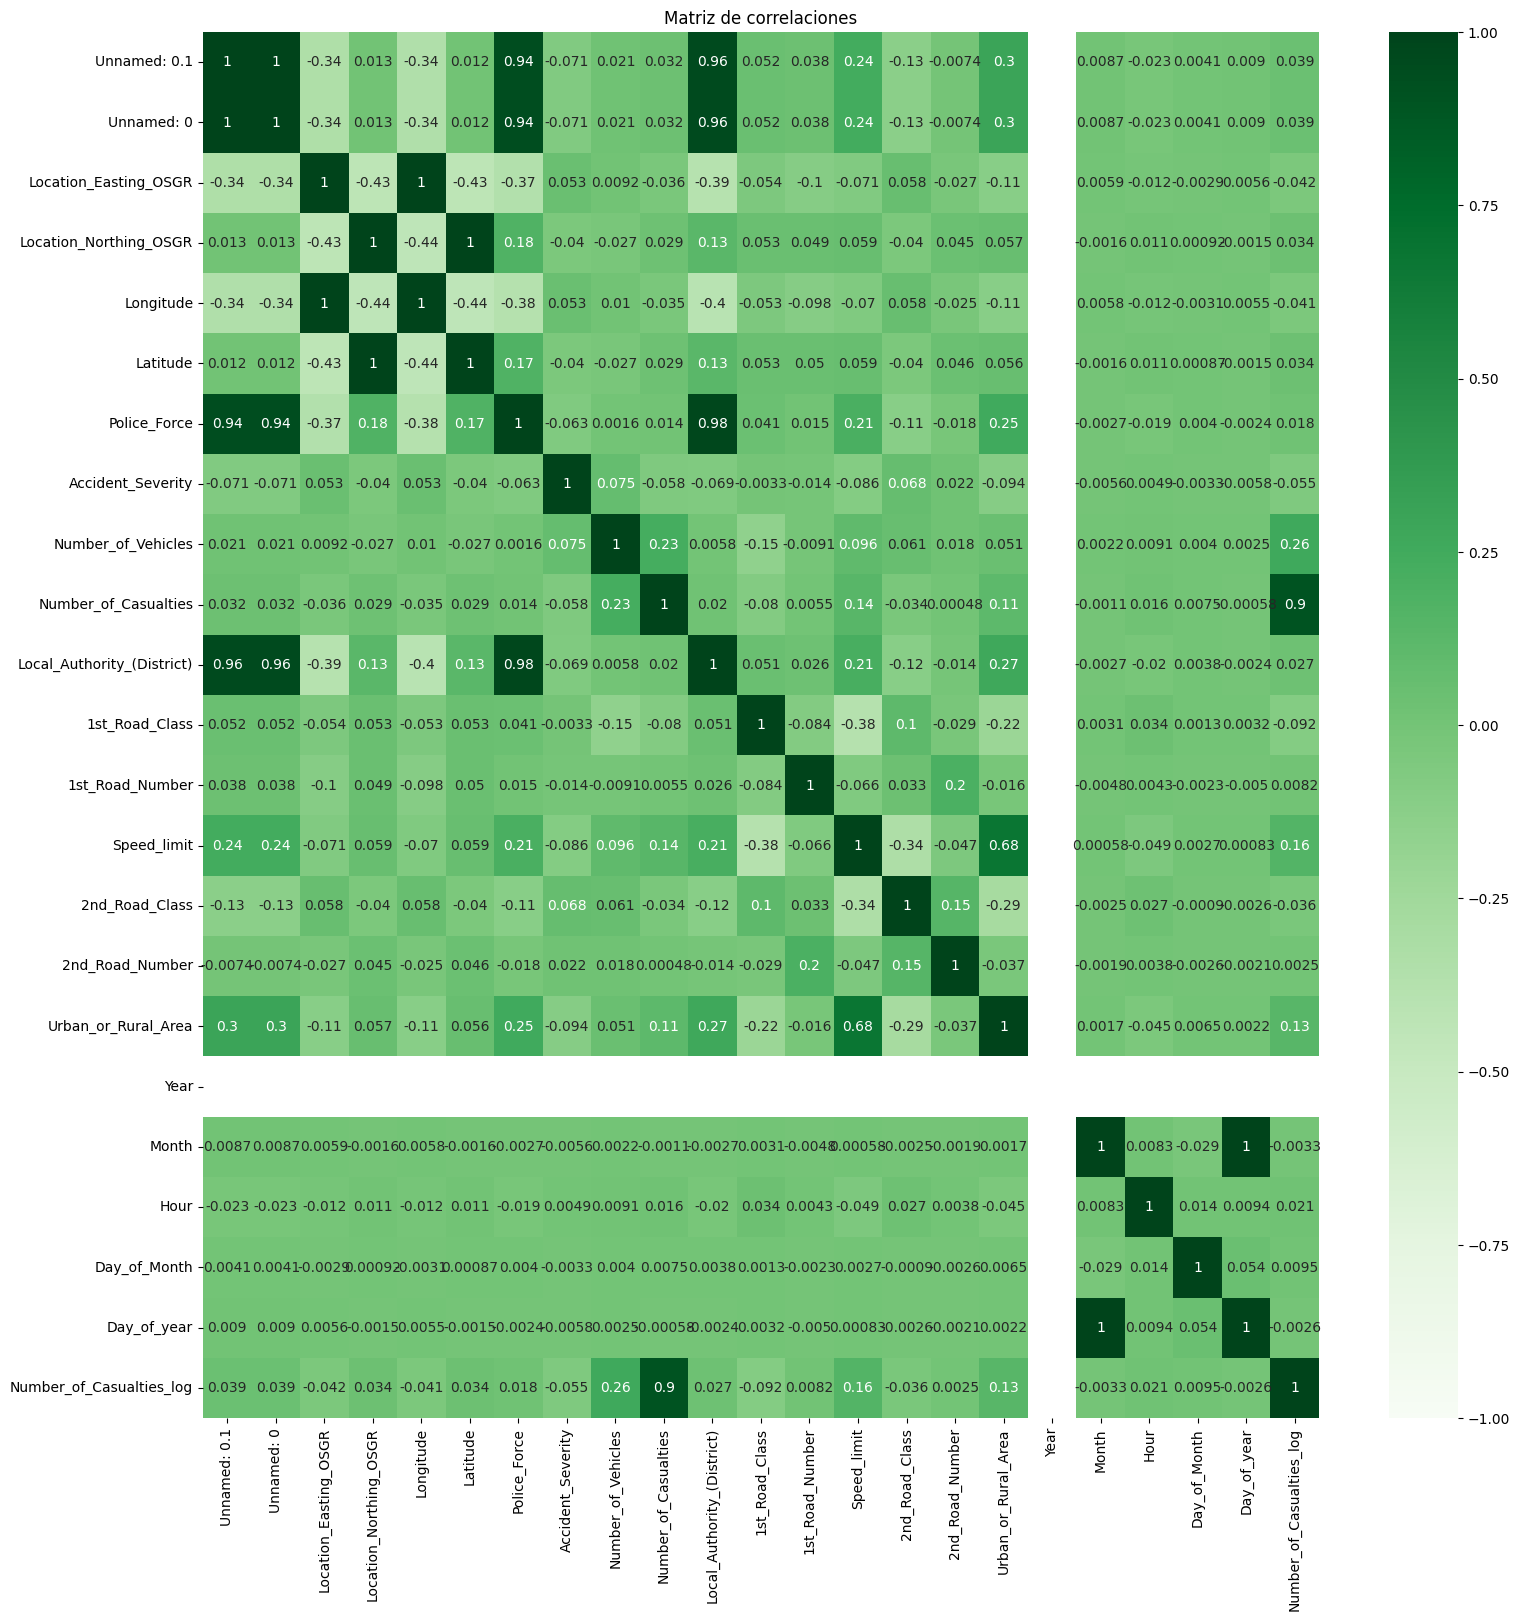

In [ ]:
corr_matrix = Data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "Greens").set_title('Matriz de correlaciones')
plt.show()

In [ ]:
Variable_obj = pd.DataFrame(corr_matrix['Number_of_Casualties'].sort_values(ascending=False))
Variable_obj

,Number_of_Casualties
Number_of_Casualties,1.000000
Number_of_Casualties_log,0.904197
Number_of_Vehicles,0.229829
Speed_limit,0.138503
Urban_or_Rural_Area,0.114192
Unnamed: 0,0.031783
Unnamed: 0.1,0.031783
Latitude,0.029246
Location_Northing_OSGR,0.029116
Local_Authority_(District),0.020365


# Simulación de datos faltantes

Teniendo en cuenta los requisitos del proyecto, el dataset al menos ha de tener un 5% de datos faltantes en al menos el 3 columnas, el dataset actualmente contiene datos faltantes en una columna, la cúal es LSOA_of_Accident_Location

In [ ]:
#Porcentaje de datos faltantes para cada variable del dataset
def Missing():
    total           = Data.isnull().sum().sort_values(ascending=False)
    percent         = (Data.isnull().sum()/Data.isnull().count()*100).sort_values(ascending=False)
    missing_data    = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing_data.loc[missing_data.Total != 0]
Missing()

,Total,Percent
LSOA_of_Accident_Location,9277,6.340127


Por lo que es necesario simular la falta de datos de dos columnas más, en este caso se escogieron:
- Police_Force
- Road_Type
- Number_of_Vehicles

In [ ]:
def Random_NAN(DataFrame, Column, Percentage):
    D = DataFrame.sample(frac =Percentage)
    for i in D.index:
        DataFrame[Column].loc[i] = np.nan

Random_NAN(Data, 'Police_Force', 0.05)
Random_NAN(Data, 'Road_Type', 0.05)
Random_NAN(Data, 'Number_of_Vehicles', 0.05)

In [ ]:
Missing()

,Total,Percent
LSOA_of_Accident_Location,9277,6.340127
Road_Type,7316,4.999932
Police_Force,7316,4.999932
Number_of_Vehicles,7316,4.999932


# Tratamiento de datos

## Rellenar datos faltantes

Es posible ver que en la columna **LSOA_of_Accident_Location** faltan alrededor del 6% de los datos, estos corresponden a una notación o nomenclatura y cuyos datos son únicos para cada zona del Reino Unido, estos datos nos dan poca información y supondría una tarea tediosa rellenar los datos faltantes con los correctos, por lo que es mejor eliminar esa columna.

In [ ]:
Data.drop(columns=['LSOA_of_Accident_Location'], inplace = True)

En cuanto a los policias que atendieron la zona, y el número de vehiculos se puede analizar primero la distribución que siguen estos datos

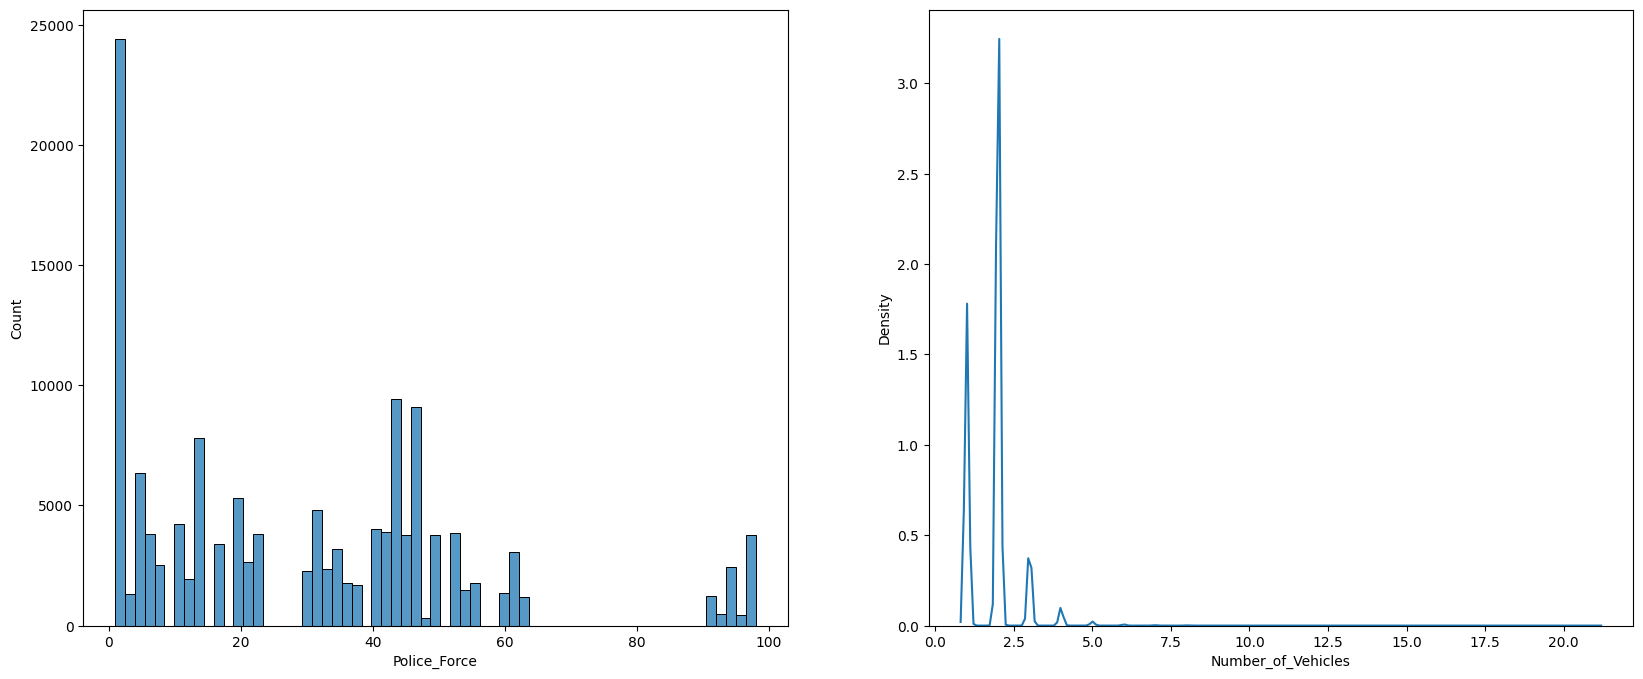

,Mediana,Moda
Police_Force,30.0,1.0
Number_of_Vehicles,2.0,2.0


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))

sns.histplot(x = 'Police_Force', data = Data, ax = ax1)
sns.kdeplot(x = 'Number_of_Vehicles', data = Data, ax = ax2)

plt.show()

pd.DataFrame({'Mediana' : [Data['Police_Force'].median(), Data['Number_of_Vehicles'].median()],
              'Moda' : [Data['Police_Force'].mode()[0], Data['Number_of_Vehicles'].mode()[0]]},
             index=['Police_Force', 'Number_of_Vehicles'])

Se puede observar que hay una gran cantidad de datos con un valor cercano a 1 para Police_Force, por lo que se puede reemplazar los datos faltantes con ese valor, el cúal sería la moda.

Para el número de vehiculos no hay mayor diferencia por lo que se usará la moda también.

In [ ]:
Data['Police_Force'].fillna(Data.Police_Force.mode()[0], inplace=True)
Data['Number_of_Vehicles'].fillna(Data.Number_of_Vehicles.mode()[0], inplace=True)

Para el tipo de vía se pueden agrupar todos los datos faltantes en la clase 'Unknown'

In [ ]:
Data['Road_Type'].fillna('Unknown', inplace=True)

Ahora se puede revisar que no hay datos faltantes

In [ ]:
Missing()

,Total,Percent


## Eliminación de variables no relevantes para el modelo

Se pueden eliminar las siguientes variables del dataset ya que no representan información relevante o es información duplicada:

- **Location_Easting_OSGR** y **Location_Northing_OSGR** es información duplicada de Longitude y Latitude.
- **Year** ya que todos los datos son del 2014.
- **Number_of_Casualties_log** ya que es una columna que se creó para mejor visualización de datos
- **Unnamed: 0**	y **Accident_Index** ya que solo son un indentificador del accidente
- **Carriageway_Hazards** y **Special_Conditions_at_Site** ya que la mayoria de datos son nulos
- **Pedestrian_Crossing-Physical_Facilities** y **Pedestrian_Crossing-Human_Control** debido a que en la mayoria de accidentes no hay ninguna facilidad de movilidad en al menos 50 metros.
- También se eliminaran las columnas con menos relación con la variable objetivo.

In [ ]:
No_rel = ['Location_Easting_OSGR','Location_Northing_OSGR','Number_of_Casualties_log', 'Year',
          'Unnamed: 0', 'Accident_Index', 'Carriageway_Hazards', 'Special_Conditions_at_Site',
          'Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control','Day_of_Month',
          '1st_Road_Number','2nd_Road_Number','Day_of_year','Month','2nd_Road_Class','Accident_Severity',
          '1st_Road_Class']
Data.drop(columns = No_rel, inplace = True)

## Añadir variables que pueden ser relevantes

Se pretende añadir 3 variables que podrían afectar en los accidentes, relacionadas con el tiempo y la luz del entorno:

- Una variable que nos indique si es de día o de noche en el momento del accidente
- Una variable que nos indique la estación del año en el momento del accidente
- Una variable binaria que nos indique si está bien iluminada la zona o no

In [ ]:
Data['Day_Night'] = Data['Timestamp'].apply(lambda x: 1 if x.hour >=6 and x.hour <=18 else 0)

Data['Season'] = Data['Timestamp'].apply(lambda x: 'Spring' if x.month==3 or x.month==4 or x.month==5 else
                                                  'Summer' if x.month==6 or x.month==7 or x.month==8 else
                                                  'Autumn' if x.month==9 or x.month==10 or x.month==11 else
                                                  'Winter')

Data['Light'] = Data['Light_Conditions'].apply(lambda x: 1 if 'Daylight' in x or 'present and lit' in x else 0)

## Transformación de variables categoricas

Es necesario convertir las variables categoricas a forma númerica para ser usadas en modelos

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
V_cat = ['Day_of_Week','Local_Authority_(Highway)','Road_Type','Junction_Control',
         'Light_Conditions','Weather_Conditions','Road_Surface_Conditions',
         'Did_Police_Officer_Attend_Scene_of_Accident','Season'] #Variables categoricas

encoder = LabelEncoder()

for i in V_cat:
    Data[i] = encoder.fit_transform(Data[i])

En este momento solo quedan dos variables con un tipo de datos que no es un número, La información de *Time* se puede obtener a partir de la columna *Hour* por lo que se puede eliminar, la columna *Date* se podria eliminar también

In [ ]:
Data.drop(columns = ['Time', 'Date'], inplace = True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146322 entries, 51924 to 198245
Data columns (total 22 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Unnamed: 0.1                                 146322 non-null  int64         
 1   Longitude                                    146322 non-null  float64       
 2   Latitude                                     146322 non-null  float64       
 3   Police_Force                                 146322 non-null  float64       
 4   Number_of_Vehicles                           146322 non-null  float64       
 5   Number_of_Casualties                         146322 non-null  int64         
 6   Day_of_Week                                  146322 non-null  int64         
 7   Local_Authority_(District)                   146322 non-null  int64         
 8   Local_Authority_(Highway)                    146322 non-null

In [ ]:
#Eliminamos Timestamp ya que no es necesario
Data.drop(columns = ['Timestamp'], inplace = True)

# Modelos

Para generar un modelo inicial primero es necesario separar los datos en *X* y *y*, se realizara un modelo sencillo para iniciar, en este caso un decision tree

## Primeras iteraciones con modelos

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#Metricas
#RMSE
def RMSE(y_actual, y_pred):
    N = y_actual.size
    return np.sqrt(np.sum((y_actual - y_pred)**2)/N)

#MAE
def MAE(y_actual, y_pred):
    N = y_actual.size
    return np.sum(np.abs(y_actual - y_pred))/N

In [ ]:
X = Data.drop(columns = ['Number_of_Casualties'])
y = Data['Number_of_Casualties'].values

In [ ]:
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=0.3)

In [ ]:
Dec_tree = DecisionTreeRegressor(max_depth=3)
Dec_tree2 = DecisionTreeRegressor(max_depth=5)

Dec_tree.fit(Xtv, ytv)
Dec_tree2.fit(Xtv, ytv)

y1 = Dec_tree.predict(Xts)
y2 = Dec_tree2.predict(Xts)

RMSE(yts, y1), RMSE(yts, y2)

(0.7381820997723866, 0.7348291295498341)

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Random_Forest = RandomForestRegressor(max_depth=3)
Random_Forest.fit(Xtv, ytv)
y3 = Random_Forest.predict(Xts)

RMSE(yts, y3)

0.7368052258245333

Graficamos la importancia de cada Feature para el modelo de Random Forest, lo cual nos ayuda a escoger los parametros que mejor describen el problema y que nos ayuda a mejorar los modelos.

In [ ]:
from sklearn import svm
FI_RF = pd.DataFrame({'Feature' : X.columns, 'Importance' : Random_Forest.feature_importances_}).set_index(['Feature']).sort_values(by = 'Importance')
FI_RF

,Importance
Feature,
Unnamed: 0.1,0.000000
Day_Night,0.000000
Hour,0.000000
Road_Surface_Conditions,0.000000
Weather_Conditions,0.000000
Light_Conditions,0.000000
Season,0.000000
Light,0.000000
Local_Authority_(District),0.000000


<BarContainer object of 20 artists>

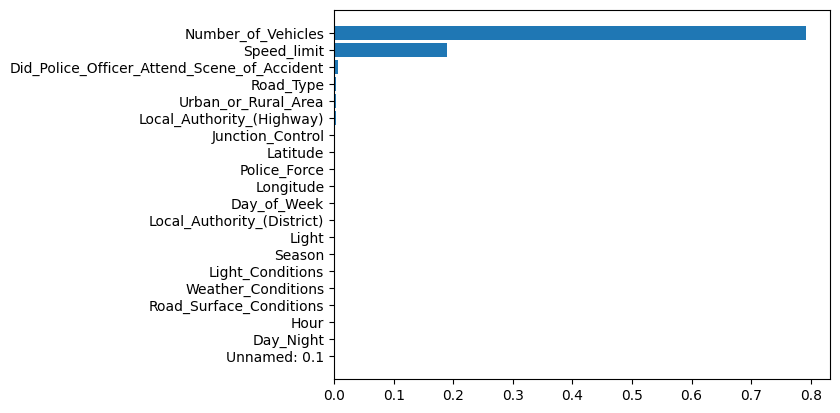

In [ ]:
plt.barh(FI_RF.index, FI_RF.Importance)

Podemos observar que para el Random Forest los parámetros más significativos son el número de vehiculos y la velocidad máxima, y en menor medida el tipo de de camino, la presencia de policias, la autoridad local, la latitud y la estación del año.

Se procede a volver probar los modelos de Decision Tree y Random Forest eliminando las variables que son menos relevantes para el Random Forrest

### Eliminación de variables irrelevantes para Random Forest

Se probará dos métodos:

-Eliminar las columnas con importancia igual a 0
-Mantener solo las columnas con mayor importancia

In [ ]:
Data_RF1 = Data.drop(columns = FI_RF[FI_RF.Importance == 0].index, inplace = False)
Data_RF2 = Data.drop(columns = FI_RF[FI_RF.Importance < 0.1].index, inplace = False)

X_RF1 = Data_RF1.drop(columns = ['Number_of_Casualties'])
y_RF1 = Data_RF1['Number_of_Casualties'].values

X_RF2 = Data_RF2.drop(columns = ['Number_of_Casualties'])
y_RF2 = Data_RF2['Number_of_Casualties'].values

Xtv1, Xts1, ytv1, yts1 = train_test_split(X_RF1, y_RF1, test_size=0.3)
Xtv2, Xts2, ytv2, yts2= train_test_split(X_RF2, y_RF2, test_size=0.3)

#Decision Tree

Dec_tree = DecisionTreeRegressor(max_depth=3)
Dec_tree2 = DecisionTreeRegressor(max_depth=5)

Dec_tree.fit(Xtv1, ytv1)
Dec_tree2.fit(Xtv1, ytv1)

y1_RF1 = Dec_tree.predict(Xts1)
y2_RF1 = Dec_tree2.predict(Xts1)


Dec_tree = DecisionTreeRegressor(max_depth=3)
Dec_tree2 = DecisionTreeRegressor(max_depth=5)

Dec_tree.fit(Xtv2, ytv2)
Dec_tree2.fit(Xtv2, ytv2)

y1_RF2 = Dec_tree.predict(Xts2)
y2_RF2 = Dec_tree2.predict(Xts2)

#Random Forest

Random_Forest = RandomForestRegressor(max_depth=3)
Random_Forest.fit(Xtv1, ytv1)
y3_RF1 = Random_Forest.predict(Xts1)

Random_Forest = RandomForestRegressor(max_depth=3)
Random_Forest.fit(Xtv2, ytv2)
y3_RF2 = Random_Forest.predict(Xts2)



pd.DataFrame({'Modelo' : ['Decision Tree (depth 3)', 'Decision Tree (depth 5)', 'Random Forest'],
             'RMSE usando todas la variables' : [RMSE(yts, y1), RMSE(yts, y2), RMSE(yts, y3)],
             'RMSE sin variables 0' : [RMSE(yts1, y1_RF1), RMSE(yts1, y2_RF1), RMSE(yts1, y3_RF1)],
             'RMSE solo mayor importancia' : [RMSE(yts2, y1_RF2), RMSE(yts2, y2_RF2), RMSE(yts2, y3_RF2)],
             'MAE usando todas la variables' : [MAE(yts, y1), MAE(yts, y2), MAE(yts, y3)],
             'MAE sin variables 0' : [MAE(yts1, y1_RF1), MAE(yts1, y2_RF1), MAE(yts1, y3_RF1)],
             'MAE solo mayor importancia' : [MAE(yts2, y1_RF2), MAE(yts2, y2_RF2), MAE(yts2, y3_RF2)]}).set_index(['Modelo'])

,RMSE usando todas la variables,RMSE sin variables 0,RMSE solo mayor importancia,MAE usando todas la variables,MAE sin variables 0,MAE solo mayor importancia
Modelo,,,,,,
Decision Tree (depth 3),0.738182,0.840559,0.835143,0.465971,0.464288,0.465404
Decision Tree (depth 5),0.734829,0.834166,0.834000,0.456633,0.455477,0.464419
Random Forest,0.736805,0.838893,0.834601,0.465444,0.462987,0.465248


Se puede apreciar un aumento pequeño en la exactitud al eliminar las variables con importancia igual a 0, sin embargo, no hay mejora al utilizar solo las variables más importantes. Por lo que se procederá a depurar nuevamente el Dataset para que no contenga estas variables.

Además como vista general se aprecia que los errores son en general pequeños para los modelos, siendo menores a 1, lo que quiere decir que el error es en general de menos de 1 persona para predecir las victimas.

In [ ]:
Data = Data_RF1

## Crear una variable clasificatoria de las víctimas

También se considera interesante ver el funcionamiento de los modelos al realizar un modelo de clasificación en lugar de una regresión, para ello se clasifican los accidentes dependiendo del número de víctimas:
- De 0 a 4 victimas se considera un accidente leve
- De 5 a 9 víctimas se considera un accidente moderado
- De 10 a más víctimas se considera un accidente grave

In [ ]:
def Clasificar_victimas(row):
    if row['Number_of_Casualties'] < 5:
        val = 'Accidente Leve'
    elif row['Number_of_Casualties'] < 10:
        val = 'Accidente Moderado'
    else:
        val = 'Accidente Grave'
    return val

Data['Gravedad_Accidente'] = Data.apply(Clasificar_victimas, axis = 1)
Data

,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(Highway),Road_Type,Speed_limit,Junction_Control,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Gravedad_Accidente
51924,51.496345,1.0,2.0,1,111,3,30,3,1,0,Accidente Leve
51925,51.489523,1.0,2.0,1,111,3,30,2,1,0,Accidente Leve
51926,51.490536,1.0,2.0,1,111,3,30,2,1,1,Accidente Leve
51927,51.496668,1.0,1.0,1,111,5,30,2,1,0,Accidente Leve
51928,51.495892,1.0,2.0,1,111,3,30,2,1,1,Accidente Leve
...,...,...,...,...,...,...,...,...,...,...,...
198241,55.264773,98.0,2.0,1,154,0,70,3,2,1,Accidente Leve
198242,55.054855,98.0,2.0,2,154,0,70,3,2,1,Accidente Leve
198243,54.985668,1.0,1.0,1,154,3,40,3,2,1,Accidente Leve
198244,54.990446,98.0,3.0,2,154,3,60,2,2,1,Accidente Leve


Ahora que tenemos una clasificación categórica de los datos podemos realizar nuevamente modelos para observar su comportamiento.

In [ ]:
X = Data.drop(columns = ['Gravedad_Accidente', 'Number_of_Casualties'])
y = Data['Gravedad_Accidente'].values
y = 1.*(y == 'Accidente Leve') + 2.*(y == 'Accidente Moderado') +  3.*(y == 'Accidente Grave')

In [ ]:
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=0.3)

In [ ]:
Dec_tree = DecisionTreeRegressor(max_depth=3)
Dec_tree2 = DecisionTreeRegressor(max_depth=5)

Dec_tree.fit(Xtv, ytv)
Dec_tree2.fit(Xtv, ytv)

y1 = Dec_tree.predict(Xts)
y2 = Dec_tree2.predict(Xts)

RMSE(yts, y1), RMSE(yts, y2)

(0.0986057838207559, 0.09931975933343755)

Redondeamos los números a valores enteros

In [ ]:
RMSE(yts, np.rint(y1)), RMSE(yts, np.rint(y2))

(0.09977535877118769, 0.10034453257713769)

### Support vector Classification

In [ ]:
from sklearn import svm

In [ ]:
svclass = svm.SVC()
svclass.fit(Xtv, ytv)

y4 = svclass.predict(Xts)

RMSE(yts, y4)

0.0996611339383524

In [ ]:
y4

array([1., 1., 1., ..., 1., 1., 1.])

A simple vista se puede observar que el Support Vector Classification es el modelo que mejor resultados genera al predecir la gravedad de los accidentes, sin embargo se ejecutará un cross validation para confirmar estos resultados.

## Selección de modelo

En la siguiente sección se busca encontrar un modelo que muestre mejor desempeño al clasificar los accidentes en las categorías antes mencionadas. Para ello se usaran los clasificadores de Decision Tree y Random Forest, además del SVC

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimator1 = RandomForestClassifier(max_depth=3)
estimator2 = DecisionTreeClassifier(max_depth=3)
estimator3 = svm.SVC()

In [ ]:
def report_cv_score(z):

    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMSE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSE  Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

val_size  = 0.3/(1-0.3)
zscores = []
estimators = [estimator1, estimator2, estimator3]
for estimator in estimators:
    print("---------")
    z = cross_validate(estimator, Xtv, ytv, return_train_score=True, return_estimator=False,
                       scoring="neg_mean_squared_error", cv=ShuffleSplit(n_splits=10, test_size=val_size))
    report_cv_score(z)
    zscores.append(np.mean(np.sqrt(z['test_score']*(-1))))
best = np.argmin(zscores)
print ("Seleccionado: ", best)
best_estimator = estimators[best]
print ("\n Mejor modelo: ")
print (best_estimator)

---------
RMSE Test:  0.10296 (± 0.00260557 )
RMSE  Train:  0.10294 (± 0.00197447 )
---------
RMSE Test:  0.10297 (± 0.00284230 )
RMSE  Train:  0.10276 (± 0.00218868 )
---------
RMSE Test:  0.10266 (± 0.00194571 )
RMSE  Train:  0.10318 (± 0.00145104 )
Seleccionado:  2

 Mejor modelo: 
SVC()


Se puede apreciar que el modelo que mejor resultados da es el Clasificador de Decision Tree.

Ahora se buscarán los parámetros que mejor se ajusten al Modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
parametros = {'max_depth': [2,5,8,10,15]}

decission_tree = GridSearchCV(estimator = estimator1,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size),
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(Xtv, ytv)

print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 2}


In [ ]:
Modelo_selec = DecisionTreeClassifier(max_depth=2)
Modelo_selec.fit(Xtv, ytv)

print('El error RSME del modelo de Decision Tree Classifier es\n En test: '+str(RMSE(yts,  Modelo_selec.predict(Xts)))+
      '\n En train: '+str(RMSE(ytv,  Modelo_selec.predict(Xtv))))

El error RSME del modelo de Decision Tree Classifier es
 En test: 0.0996611339383524
 En train: 0.10297028773491829


## Métodos no supervisados

Principal Component Analysis

In [ ]:
X = Data.drop(columns = ['Gravedad_Accidente', 'Number_of_Casualties'])
y = Data['Gravedad_Accidente'].values
y = 1.*(y == 'Accidente Leve') + 2.*(y == 'Accidente Moderado') +  3.*(y == 'Accidente Grave')

In [ ]:
from sklearn.decomposition import PCA
components = [1,3,5]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Dec_tree = DecisionTreeClassifier(max_depth = 15)
for i in components:
    pca = PCA(n_components = i)
    X_t = pca.fit_transform(X)

    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)
    print (Xtv.shape, Xts.shape)

    Dec_tree.fit(Xtv, ytv)
    perf.append(RMSE(yts , Dec_tree.predict(Xts)))
    print('RMSE del modelo con ', i ,'elementos: ',"{:.5f}".format(RMSE(yts , Dec_tree.predict(Xts))))
    print('------------')

print('Mejor RMSE: ',"{:.5f}".format(np.min(perf)),'  ; obtenido con ',components[np.argmin(perf)],' componentes para PCA')

(102425, 1) (43897, 1)
RMSE del modelo con  1 elementos:  0.10694
------------
(102425, 3) (43897, 3)
RMSE del modelo con  3 elementos:  0.10915
------------
(102425, 5) (43897, 5)
RMSE del modelo con  5 elementos:  0.11214
------------
Mejor RMSE:  0.10694   ; obtenido con  1  componentes para PCA


In [ ]:
pca = PCA(n_components = components[np.argmin(perf)])
X_t1 = pca.fit_transform(X)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)

parametros = {'max_depth': [2,5,8,10,15]}

decission_tree = GridSearchCV(estimator = estimator1,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size),
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(Xtv, ytv)

print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 2}


In [ ]:
Modelo_selec = DecisionTreeClassifier(max_depth=2)
Modelo_selec.fit(Xtv, ytv)

print('El error RSME del modelo de Decision Tree Classifier es\n En test: '+str(RMSE(yts,  Modelo_selec.predict(Xts)))+
      '\n En train: '+str(RMSE(ytv,  Modelo_selec.predict(Xtv))))

El error RSME del modelo de Decision Tree Classifier es
 En test: 0.10247856663177594
 En train: 0.10173021124480244


# Curvas de Aprendizaje

Método Supervisado

In [ ]:
from sklearn.model_selection import learning_curve

X = Data.drop(columns = ['Gravedad_Accidente', 'Number_of_Casualties'])
y = Data['Gravedad_Accidente'].values
y = 1.*(y == 'Accidente Leve') + 2.*(y == 'Accidente Moderado') +  3.*(y == 'Accidente Grave')

In [ ]:
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)

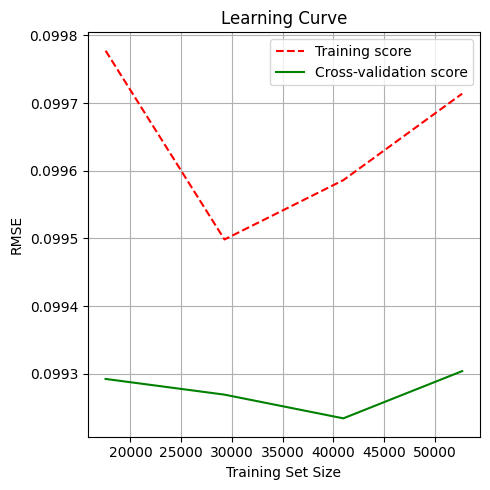

In [ ]:
Des_tree1 = DecisionTreeClassifier(max_depth=2)
train_sizes, train_scores, valid_scores = learning_curve(Des_tree1, Xtv, ytv, train_sizes= [0.3, 0.5,0.7,0.9],
                 scoring ='neg_root_mean_squared_error', cv = ShuffleSplit(n_splits=10, test_size=val_size))

train_scores = np.abs(train_scores)
valid_scores = np.abs(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
plt.plot(train_sizes, valid_mean, color="g", label="Cross-validation score")



plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("RMSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Método no supervisado

In [ ]:
X = Data.drop(columns = ['Gravedad_Accidente', 'Number_of_Casualties'])
y = Data['Gravedad_Accidente'].values
y = 1.*(y == 'Accidente Leve') + 2.*(y == 'Accidente Moderado') +  3.*(y == 'Accidente Grave')

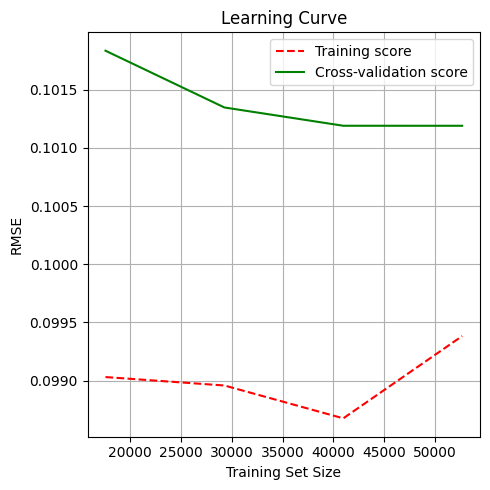

In [ ]:
pca = PCA(n_components = components[np.argmin(perf)])
X_t1 = pca.fit_transform(X)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)

Des_tree1 = DecisionTreeClassifier(max_depth=2)
train_sizes, train_scores, valid_scores = learning_curve(Des_tree1, Xtv, ytv, train_sizes= [0.3, 0.5,0.7,0.9],
                 scoring ='neg_root_mean_squared_error', cv = ShuffleSplit(n_splits=10, test_size=val_size))

train_scores = np.abs(train_scores)
valid_scores = np.abs(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
plt.plot(train_sizes, valid_mean, color="g", label="Cross-validation score")



plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("RMSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()